In [1]:
from pylab import *
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("application_record.csv", encoding = 'utf-8') 
record = pd.read_csv("credit_record.csv", encoding = 'utf-8')  

In [5]:
sns.set_style('white')

In [6]:
#Feature Engineering
#Response Variable
# find all users' account open month.
begin_month=pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
new_data=pd.merge(data,begin_month,how="left",on="ID") #merge to record data
print(new_data)

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0      

In [7]:
record['dep_value'] = None
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes' 
record['dep_value'][record['STATUS'] =='4']='Yes' 
record['dep_value'][record['STATUS'] =='5']='Yes' 
print(record)

/Users/luya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/luya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/luya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

              ID  MONTHS_BALANCE STATUS dep_value
0        5001711               0      X      None
1        5001711              -1      0      None
2        5001711              -2      0      None
3        5001711              -3      0      None
4        5001712               0      C      None
...          ...             ...    ...       ...
1048570  5150487             -25      C      None
1048571  5150487             -26      C      None
1048572  5150487             -27      C      None
1048573  5150487             -28      C      None
1048574  5150487             -29      C      None

[1048575 rows x 4 columns]


/Users/luya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
cpunt=record.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No'
cpunt = cpunt[['dep_value']]
new_data=pd.merge(new_data,cpunt,how='inner',on='ID')
new_data['target']=new_data['dep_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0
print(new_data)

            ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0      5008804           M            Y               Y             0   
1      5008805           M            Y               Y             0   
2      5008806           M            Y               Y             0   
3      5008808           F            N               Y             0   
4      5008809           F            N               Y             0   
...        ...         ...          ...             ...           ...   
36452  5149828           M            Y               Y             0   
36453  5149834           F            N               Y             0   
36454  5149838           F            N               Y             0   
36455  5150049           F            N               Y             0   
36456  5150337           M            N               Y             0   

       AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0              427500.0               Worki

In [9]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

No     45318
Yes      667
Name: dep_value, dtype: int64


No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

In [10]:
new_data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occyp'
                        },inplace=True)
print(new_data)

            ID Gender Car Reality  ChldNo       inc                 inctp  \
0      5008804      M   Y       Y       0  427500.0               Working   
1      5008805      M   Y       Y       0  427500.0               Working   
2      5008806      M   Y       Y       0  112500.0               Working   
3      5008808      F   N       Y       0  270000.0  Commercial associate   
4      5008809      F   N       Y       0  270000.0  Commercial associate   
...        ...    ...  ..     ...     ...       ...                   ...   
36452  5149828      M   Y       Y       0  315000.0               Working   
36453  5149834      F   N       Y       0  157500.0  Commercial associate   
36454  5149838      F   N       Y       0  157500.0             Pensioner   
36455  5150049      F   N       Y       0  283500.0               Working   
36456  5150337      M   N       Y       0  112500.0               Working   

                               edutp                 famtp              hou

In [11]:
new_data.dropna()
print(new_data)
new_data = new_data.mask(new_data == 'NULL').dropna()
print(new_data)

            ID Gender Car Reality  ChldNo       inc                 inctp  \
0      5008804      M   Y       Y       0  427500.0               Working   
1      5008805      M   Y       Y       0  427500.0               Working   
2      5008806      M   Y       Y       0  112500.0               Working   
3      5008808      F   N       Y       0  270000.0  Commercial associate   
4      5008809      F   N       Y       0  270000.0  Commercial associate   
...        ...    ...  ..     ...     ...       ...                   ...   
36452  5149828      M   Y       Y       0  315000.0               Working   
36453  5149834      F   N       Y       0  157500.0  Commercial associate   
36454  5149838      F   N       Y       0  157500.0             Pensioner   
36455  5150049      F   N       Y       0  283500.0               Working   
36456  5150337      M   N       Y       0  112500.0               Working   

                               edutp                 famtp              hou

/Users/luya/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [12]:
ivtable=pd.DataFrame(new_data.columns,columns=['variable'])
ivtable['IV']=None
namelist = ['FLAG_MOBIL','begin_month','dep_value','target','ID']

for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)
print(ivtable)

         variable    IV
1          Gender  None
2             Car  None
3         Reality  None
4          ChldNo  None
5             inc  None
6           inctp  None
7           edutp  None
8           famtp  None
9           houtp  None
10     DAYS_BIRTH  None
11  DAYS_EMPLOYED  None
13        wkphone  None
14          phone  None
15          email  None
16          occyp  None
17        famsize  None


In [13]:
sns.set_style("whitegrid") 

In [14]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    lst = []
    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data

In [15]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [16]:
def get_category(df, col, binsnum, labels, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
new_data['Gender'] = new_data['Gender'].replace(['F','M'],[0,1])
print(new_data['Gender'].value_counts())
iv, data = calc_iv(new_data,'Gender','target')
ivtable.loc[ivtable['variable']=='Gender','IV']=iv
data.head()

0    15630
1     9504
Name: Gender, dtype: int64
This variable's IV is: 0.02520350452745081
0    15630
1     9504
Name: Gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Gender,0,15630,15400,230,0.621867,0.014715,0.623179,0.545024,0.134005,0.010473
1,Gender,1,9504,9312,192,0.378133,0.020202,0.376821,0.454976,-0.188475,0.014730


In [19]:
new_data['Car'] = new_data['Car'].replace(['N','Y'],[0,1])
print(new_data['Car'].value_counts())
iv, data=calc_iv(new_data,'Car','target')
ivtable.loc[ivtable['variable']=='Car','IV']=iv
data.head()

0    14618
1    10516
Name: Car, dtype: int64
This variable's IV is: 4.54248124999671e-06
0    14618
1    10516
Name: Car, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Car,0,14618,14373,245,0.581603,0.016760,0.58162,0.580569,0.00181,0.000002
1,Car,1,10516,10339,177,0.418397,0.016831,0.41838,0.419431,-0.00251,0.000003


In [20]:
new_data['Reality'] = new_data['Reality'].replace(['N','Y'],[0,1])
print(new_data['Reality'].value_counts())
iv, data=calc_iv(new_data,'Reality','target')
ivtable.loc[ivtable['variable']=='Reality','IV']=iv
data.head()

1    16461
0     8673
Name: Reality, dtype: int64
This variable's IV is: 0.02744070350168343
1    16461
0     8673
Name: Reality, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Reality,0,8673,8494,179,0.34507,0.020639,0.34372,0.424171,-0.210309,0.016920
1,Reality,1,16461,16218,243,0.65493,0.014762,0.65628,0.575829,0.130777,0.010521


In [21]:
new_data['phone']=new_data['phone'].astype(str)
print(new_data['phone'].value_counts(normalize=True,sort=False))
new_data.drop(new_data[new_data['phone'] == 'nan' ].index, inplace=True)
iv, data=calc_iv(new_data,'phone','target')
ivtable.loc[ivtable['variable']=='phone','IV']=iv
data.head()

1    0.292791
0    0.707209
Name: phone, dtype: float64
This variable's IV is: 0.0005480495762639297
0    17775
1     7359
Name: phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,phone,0,17775,17481,294,0.707209,0.016540,0.707389,0.696682,0.015251,0.000163
1,phone,1,7359,7231,128,0.292791,0.017394,0.292611,0.303318,-0.035937,0.000385


In [22]:
print(new_data['email'].value_counts(normalize=True,sort=False))
new_data['email']=new_data['email'].astype(str)
iv, data=calc_iv(new_data,'email','target')
ivtable.loc[ivtable['variable']=='email','IV']=iv
data.head()

0    0.89934
1    0.10066
Name: email, dtype: float64
This variable's IV is: 1.7343581493999816e-05
0    22604
1     2530
Name: email, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,email,0,22604,22225,379,0.89934,0.016767,0.899361,0.898104,0.001398,0.000002
1,email,1,2530,2487,43,0.10066,0.016996,0.100639,0.101896,-0.012407,0.000016


In [23]:
new_data['wkphone']=new_data['wkphone'].astype(str)
iv, data = calc_iv(new_data,'wkphone','target')
new_data.drop(new_data[new_data['wkphone'] == 'nan' ].index, inplace=True)
ivtable.loc[ivtable['variable']=='wkphone','IV']=iv
data.head()

This variable's IV is: 0.002042429795148461
0    18252
1     6882
Name: wkphone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,wkphone,0,18252,17954,298,0.726188,0.016327,0.72653,0.706161,0.028436,0.000579
1,wkphone,1,6882,6758,124,0.273812,0.018018,0.27347,0.293839,-0.071838,0.001463


In [24]:
new_data.loc[new_data['ChldNo'] >= 2,'ChldNo']='2More'
print(new_data['ChldNo'].value_counts(sort=False))

0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64


In [25]:
iv, data=calc_iv(new_data,'ChldNo','target')
ivtable.loc[ivtable['variable']=='ChldNo','IV']=iv
data.head()

This variable's IV is: 0.0011214542503301935
0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,ChldNo,0,15908,15635,273,0.632928,0.017161,0.632689,0.646919,-0.022243,0.000317
1,ChldNo,1,6118,6021,97,0.243415,0.015855,0.243647,0.229858,0.058259,0.000803
2,ChldNo,2More,3108,3056,52,0.123657,0.016731,0.123665,0.123223,0.003580,0.000002


In [26]:
new_data = convert_dummy(new_data,'ChldNo')

In [27]:
print(new_data)

            ID  Gender  Car  Reality       inc                 inctp  \
2      5008806       1    1        1  112500.0               Working   
3      5008808       0    0        1  270000.0  Commercial associate   
4      5008809       0    0        1  270000.0  Commercial associate   
5      5008810       0    0        1  270000.0  Commercial associate   
6      5008811       0    0        1  270000.0  Commercial associate   
...        ...     ...  ...      ...       ...                   ...   
36452  5149828       1    1        1  315000.0               Working   
36453  5149834       0    0        1  157500.0  Commercial associate   
36454  5149838       0    0        1  157500.0             Pensioner   
36455  5150049       0    0        1  283500.0               Working   
36456  5150337       1    0        1  112500.0               Working   

                               edutp                 famtp              houtp  \
2      Secondary / secondary special               Mar

(2.544, 18.18]      14663
(18.18, 33.66]       8464
(33.66, 49.14]       1637
(49.14, 64.62]        175
(64.62, 80.1]         124
(80.1, 95.58]          50
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: inc, dtype: int64


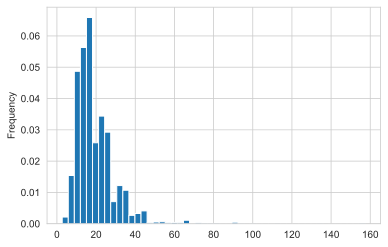

In [28]:
new_data['inc']=new_data['inc'].astype(object)
new_data['inc'] = new_data['inc']/10000 
print(new_data['inc'].value_counts(bins=10,sort=False))
new_data['inc'].plot(kind='hist',bins=50,density=True)

In [29]:
new_data = get_category(new_data,'inc', 3, ["low","medium", "high"], qcut = True)
print(new_data)
iv, data = calc_iv(new_data,'gp_inc','target')
ivtable.loc[ivtable['variable']=='inc','IV']=iv
data.head()

            ID  Gender  Car  Reality    inc                 inctp  \
2      5008806       1    1        1  11.25               Working   
3      5008808       0    0        1     27  Commercial associate   
4      5008809       0    0        1     27  Commercial associate   
5      5008810       0    0        1     27  Commercial associate   
6      5008811       0    0        1     27  Commercial associate   
...        ...     ...  ...      ...    ...                   ...   
36452  5149828       1    1        1   31.5               Working   
36453  5149834       0    0        1  15.75  Commercial associate   
36454  5149838       0    0        1  15.75             Pensioner   
36455  5150049       0    0        1  28.35               Working   
36456  5150337       1    0        1  11.25               Working   

                               edutp                 famtp              houtp  \
2      Secondary / secondary special               Married  House / apartment   
3      Se

,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_inc,high,8244,8096,148,0.328002,0.017952,0.327614,0.350711,-0.068126,0.001573
1,gp_inc,low,8996,8849,147,0.357922,0.016341,0.358085,0.348341,0.027588,0.000269
2,gp_inc,medium,7894,7767,127,0.314077,0.016088,0.314301,0.300948,0.043413,0.000580


In [30]:
new_data = convert_dummy(new_data,'gp_inc')
print(new_data)

            ID  Gender  Car  Reality    inc                 inctp  \
2      5008806       1    1        1  11.25               Working   
3      5008808       0    0        1     27  Commercial associate   
4      5008809       0    0        1     27  Commercial associate   
5      5008810       0    0        1     27  Commercial associate   
6      5008811       0    0        1     27  Commercial associate   
...        ...     ...  ...      ...    ...                   ...   
36452  5149828       1    1        1   31.5               Working   
36453  5149834       0    0        1  15.75  Commercial associate   
36454  5149838       0    0        1  15.75             Pensioner   
36455  5150049       0    0        1  28.35               Working   
36456  5150337       1    0        1  11.25               Working   

                               edutp                 famtp              houtp  \
2      Secondary / secondary special               Married  House / apartment   
3      Se

(19.951999999999998, 24.7]    0.025066
(24.7, 29.4]                  0.134280
(29.4, 34.1]                  0.169770
(34.1, 38.8]                  0.140805
(38.8, 43.5]                  0.173072
(43.5, 48.2]                  0.141880
(48.2, 52.9]                  0.099069
(52.9, 57.6]                  0.076550
(57.6, 62.3]                  0.032585
(62.3, 67.0]                  0.006923
Name: Age, dtype: float64


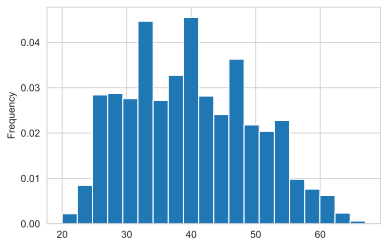

In [31]:
new_data['Age']=-(new_data['DAYS_BIRTH'])//365	
print(new_data['Age'].value_counts(bins=10,normalize=True,sort=False))
new_data['Age'].plot(kind='hist',bins=20,density=True)

In [32]:
new_data = get_category(new_data,'Age',5, ["lowest","low","medium","high","highest"])
iv, data = calc_iv(new_data,'gp_Age','target')
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','IV'] = iv
data.head()

This variable's IV is: 0.06593513858884348
medium     7916
low        7806
high       4414
lowest     4005
highest     993
Name: gp_Age, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_Age,high,4414,4323,91,0.175619,0.020616,0.174935,0.215640,-0.209194,0.008515
1,gp_Age,highest,993,989,4,0.039508,0.004028,0.040021,0.009479,1.440361,0.043992
2,gp_Age,low,7806,7686,120,0.310575,0.015373,0.311023,0.284360,0.089625,0.002390
3,gp_Age,lowest,4005,3921,84,0.159346,0.020974,0.158668,0.199052,-0.226754,0.009157
4,gp_Age,medium,7916,7793,123,0.314952,0.015538,0.315353,0.291469,0.078758,0.001881


In [33]:
new_data = convert_dummy(new_data,'gp_Age')
print(new_data)

            ID  Gender  Car  Reality    inc                 inctp  \
2      5008806       1    1        1  11.25               Working   
3      5008808       0    0        1     27  Commercial associate   
4      5008809       0    0        1     27  Commercial associate   
5      5008810       0    0        1     27  Commercial associate   
6      5008811       0    0        1     27  Commercial associate   
...        ...     ...  ...      ...    ...                   ...   
36452  5149828       1    1        1   31.5               Working   
36453  5149834       0    0        1  15.75  Commercial associate   
36454  5149838       0    0        1  15.75             Pensioner   
36455  5150049       0    0        1  28.35               Working   
36456  5150337       1    0        1  11.25               Working   

                               edutp                 famtp              houtp  \
2      Secondary / secondary special               Married  House / apartment   
3      Se

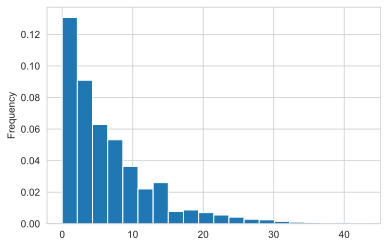

In [34]:
new_data['worktm']=-(new_data['DAYS_EMPLOYED'])//365	
new_data[new_data['worktm']<0] = np.nan #填补为缺失值
new_data['DAYS_EMPLOYED']
new_data['worktm'].fillna(new_data['worktm'].mean(),inplace=True) #均值填补
new_data['worktm'].plot(kind='hist',bins=20,density=True)

In [35]:
new_data = get_category(new_data,'worktm',5, ["lowest","low","medium","high","highest"])
iv, data=calc_iv(new_data,'gp_worktm','target')
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','IV']=iv
data.head()

This variable's IV is: 0.04022152230816303
lowest     18254
low         4987
medium      1378
high         425
highest       90
Name: gp_worktm, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_worktm,high,425,423,2,0.016909,0.004706,0.017117,0.004739,1.284186,0.015895
1,gp_worktm,highest,90,90,0,0.003581,0.000000,0.003642,0.000000,0.000000,0.000000
2,gp_worktm,low,4987,4921,66,0.198416,0.013234,0.199134,0.156398,0.241573,0.010324
3,gp_worktm,lowest,18254,17916,338,0.726267,0.018516,0.724992,0.800948,-0.099635,0.007568
4,gp_worktm,medium,1378,1362,16,0.054826,0.011611,0.055115,0.037915,0.374082,0.006434


In [36]:
new_data = convert_dummy(new_data,'gp_worktm')
print(new_data)

              ID  Gender  Car  Reality    inc                 inctp  \
2      5008806.0     1.0  1.0      1.0  11.25               Working   
3      5008808.0     0.0  0.0      1.0     27  Commercial associate   
4      5008809.0     0.0  0.0      1.0     27  Commercial associate   
5      5008810.0     0.0  0.0      1.0     27  Commercial associate   
6      5008811.0     0.0  0.0      1.0     27  Commercial associate   
...          ...     ...  ...      ...    ...                   ...   
36452  5149828.0     1.0  1.0      1.0   31.5               Working   
36453  5149834.0     0.0  0.0      1.0  15.75  Commercial associate   
36454  5149838.0     0.0  0.0      1.0  15.75             Pensioner   
36455  5150049.0     0.0  0.0      1.0  28.35               Working   
36456  5150337.0     1.0  0.0      1.0  11.25               Working   

                               edutp                 famtp              houtp  \
2      Secondary / secondary special               Married  House 

In [37]:
new_data['famsize'].value_counts(sort=False)

2.0     12697
1.0      4263
3.0      5216
4.0      2576
6.0        51
9.0         2
5.0       307
7.0        18
20.0        1
15.0        3
Name: famsize, dtype: int64

In [38]:
new_data['famsize']=new_data['famsize'].astype(int)
new_data['famsizegp']=new_data['famsize']
new_data['famsizegp']=new_data['famsizegp'].astype(object)
new_data.loc[new_data['famsizegp']>=3,'famsizegp']='3more'
iv, data=calc_iv(new_data,'famsizegp','target')
ivtable.loc[ivtable['variable']=='famsize','IV']=iv
data.head()

This variable's IV is: 0.006156138510778323
2        12697
3more     8174
1         4263
Name: famsizegp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famsizegp,1,4263,4179,84,0.169611,0.019704,0.169108,0.199052,-0.163028,0.004882
1,famsizegp,2,12697,12489,208,0.505172,0.016382,0.505382,0.492891,0.025027,0.000313
2,famsizegp,3more,8174,8044,130,0.325217,0.015904,0.325510,0.308057,0.055108,0.000962


In [39]:
new_data = convert_dummy(new_data,'famsizegp')

In [40]:
print(new_data['inctp'].value_counts(sort=False))
print(new_data['inctp'].value_counts(normalize=True,sort=False))
new_data.loc[new_data['inctp']=='Pensioner','inctp']='State servant'
new_data.loc[new_data['inctp']=='Student','inctp']='State servant'
iv, data=calc_iv(new_data,'inctp','target')
ivtable.loc[ivtable['variable']=='inctp','IV']=iv
data.head()

Pensioner                  13
Working                 15622
Commercial associate     7052
State servant            2437
Student                    10
Name: inctp, dtype: int64
Pensioner               0.000517
Working                 0.621549
Commercial associate    0.280576
State servant           0.096960
Student                 0.000398
Name: inctp, dtype: float64
This variable's IV is: 5.159303327851404e-05
Working                 15622
Commercial associate     7052
State servant            2460
Name: inctp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,inctp,Commercial associate,7052,6933,119,0.280576,0.016875,0.280552,0.281991,-0.005115,0.000007
1,inctp,State servant,2460,2418,42,0.097875,0.017073,0.097847,0.099526,-0.017013,0.000029
2,inctp,Working,15622,15361,261,0.621549,0.016707,0.621601,0.618483,0.005028,0.000016


In [41]:
new_data = convert_dummy(new_data,'inctp')

In [42]:
new_data.loc[(new_data['occyp']=='Cleaning staff') | (new_data['occyp']=='Cooking staff') | (new_data['occyp']=='Drivers') | (new_data['occyp']=='Laborers') | (new_data['occyp']=='Low-skill Laborers') | (new_data['occyp']=='Security staff') | (new_data['occyp']=='Waiters/barmen staff'),'occyp']='Laborwk'
new_data.loc[(new_data['occyp']=='Accountants') | (new_data['occyp']=='Core staff') | (new_data['occyp']=='HR staff') | (new_data['occyp']=='Medicine staff') | (new_data['occyp']=='Private service staff') | (new_data['occyp']=='Realty agents') | (new_data['occyp']=='Sales staff') | (new_data['occyp']=='Secretaries'),'occyp']='officewk'
new_data.loc[(new_data['occyp']=='Managers') | (new_data['occyp']=='High skill tech staff') | (new_data['occyp']=='IT staff'),'occyp']='hightecwk'
print(new_data['occyp'].value_counts())
iv, data=calc_iv(new_data,'occyp','target')
ivtable.loc[ivtable['variable']=='occyp','IV']=iv
data.head()         

Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64
This variable's IV is: 0.004820472062853304
Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,occyp,Laborwk,10496,10311,185,0.417602,0.017626,0.417247,0.438389,-0.049428,0.001045
1,occyp,hightecwk,4455,4375,80,0.177250,0.017957,0.177039,0.189573,-0.068404,0.000857
2,occyp,officewk,10183,10026,157,0.405148,0.015418,0.405714,0.372038,0.086652,0.002918


In [43]:
new_data = convert_dummy(new_data,'occyp')

In [44]:
iv, data=calc_iv(new_data,'houtp','target')
ivtable.loc[ivtable['variable']=='houtp','IV']=iv
data.head()

This variable's IV is: 0.0073275026880227365
House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: houtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,houtp,Co-op apartment,152,149,3,0.006048,0.019737,0.006029,0.007109,-0.164705,0.000178
1,houtp,House / apartment,22102,21738,364,0.879367,0.016469,0.879654,0.862559,0.019624,0.000335
2,houtp,Municipal apartment,812,793,19,0.032307,0.023399,0.032090,0.045024,-0.338655,0.004380
3,houtp,Office apartment,199,194,5,0.007918,0.025126,0.007850,0.011848,-0.411619,0.001646
4,houtp,Rented apartment,439,433,6,0.017466,0.013667,0.017522,0.014218,0.208939,0.000690


In [45]:
new_data = convert_dummy(new_data,'houtp')

In [46]:
new_data.loc[new_data['edutp']=='Academic degree','edutp']='Higher education'
iv, data=calc_iv(new_data,'edutp','target')
ivtable.loc[ivtable['variable']=='edutp','IV']=iv
data.head()

This variable's IV is: 0.010361794017679489
Secondary / secondary special    16808
Higher education                  7146
Incomplete higher                  993
Lower secondary                    187
Name: edutp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,edutp,Higher education,7146,7018,128,0.284316,0.017912,0.283992,0.303318,-0.065836,0.001272
1,edutp,Incomplete higher,993,972,21,0.039508,0.021148,0.039333,0.049763,-0.235206,0.002453
2,edutp,Lower secondary,187,181,6,0.007440,0.032086,0.007324,0.014218,-0.663301,0.004573
3,edutp,Secondary / secondary special,16808,16541,267,0.668736,0.015885,0.669351,0.632701,0.056310,0.002064


In [47]:
new_data = convert_dummy(new_data,'edutp')

In [48]:
new_data['famtp'].value_counts(normalize=True,sort=False)

Widow                   0.023076
Separated               0.058367
Single / not married    0.137065
Civil marriage          0.084865
Married                 0.696626
Name: famtp, dtype: float64

In [49]:
iv, data=calc_iv(new_data,'famtp','target')
ivtable.loc[ivtable['variable']=='famtp','IV']=iv
data.head()

This variable's IV is: 0.043137115423127946
Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: famtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famtp,Civil marriage,2133,2101,32,0.084865,0.015002,0.085019,0.075829,0.114394,0.001051
1,famtp,Married,17509,17232,277,0.696626,0.015820,0.697313,0.656398,0.060467,0.002474
2,famtp,Separated,1467,1452,15,0.058367,0.010225,0.058757,0.035545,0.502608,0.011666
3,famtp,Single / not married,3445,3362,83,0.137065,0.024093,0.136047,0.196682,-0.368588,0.022349
4,famtp,Widow,580,565,15,0.023076,0.025862,0.022863,0.035545,-0.441263,0.005596


In [50]:
new_data = convert_dummy(new_data,'famtp')
print(new_data)
print(ivtable)


              ID  Gender  Car  Reality    inc  DAYS_BIRTH  DAYS_EMPLOYED  \
2      5008806.0     1.0  1.0      1.0  11.25    -21474.0        -1134.0   
3      5008808.0     0.0  0.0      1.0     27    -19110.0        -3051.0   
4      5008809.0     0.0  0.0      1.0     27    -19110.0        -3051.0   
5      5008810.0     0.0  0.0      1.0     27    -19110.0        -3051.0   
6      5008811.0     0.0  0.0      1.0     27    -19110.0        -3051.0   
...          ...     ...  ...      ...    ...         ...            ...   
36452  5149828.0     1.0  1.0      1.0   31.5    -17348.0        -2420.0   
36453  5149834.0     0.0  0.0      1.0  15.75    -12387.0        -1325.0   
36454  5149838.0     0.0  0.0      1.0  15.75    -12387.0        -1325.0   
36455  5150049.0     0.0  0.0      1.0  28.35    -17958.0         -655.0   
36456  5150337.0     1.0  0.0      1.0  11.25     -9188.0        -1193.0   

       FLAG_MOBIL wkphone phone  ... houtp_Office apartment  \
2             1.0       

In [50]:
'''WOE：Concept and Application
Weight of Evidence(WoE):

woei=lnPyiPni=lnyi/ysni/ns
 
woei  is the I category's WOE value.  Pyi  is the proportion of the positive samples in this category to all positive samples.  Pni  is the ratio of negative samples ( ni ) in this class to all negative samples ( ns ).

Information Value (IV):
IVi=(Pyi−Pni)×woei
 

The IV values of the various types are the difference between the conditional positive rate and the conditional negative rate multiplied by the WOE value of the variable. The total IV value of the variable can be understood as the weighted sum of the conditional positive rate and the conditional negative rate difference:
IV=∑inIVi
 
The IV value measures the variable's ability to predict.

Relationship between IV value and predictive power

IV	Ability to predict
<0.02	Almost no predictive power
0.02~0.1	weak predictive power
0.1~0.3	Moderate predictive power
0.3~0.5	Strong predictive power
>0.5	Predictive power is too strong, need to check variables'''

"WOE：Concept and Application\nWeight of Evidence(WoE):\n\nwoei=lnPyiPni=lnyi/ysni/ns\n \nwoei  is the I category's WOE value.  Pyi  is the proportion of the positive samples in this category to all positive samples.  Pni  is the ratio of negative samples ( ni ) in this class to all negative samples ( ns ).\n\nInformation Value (IV):\nIVi=(Pyi−Pni)×woei\n \n\nThe IV values of the various types are the difference between the conditional positive rate and the conditional negative rate multiplied by the WOE value of the variable. The total IV value of the variable can be understood as the weighted sum of the conditional positive rate and the conditional negative rate difference:\nIV=∑inIVi\n \nThe IV value measures the variable's ability to predict.\n\nRelationship between IV value and predictive power\n\nIV\tAbility to predict\n<0.02\tAlmost no predictive power\n0.02~0.1\tweak predictive power\n0.1~0.3\tModerate predictive power\n0.3~0.5\tStrong predictive power\n>0.5\tPredictive power is

In [51]:
ivtable=ivtable.sort_values(by='IV',ascending=False)
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','variable']='agegp'
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','variable']='worktmgp'
ivtable.loc[ivtable['variable']=='inc','variable']='incgp'
ivtable

,variable,IV
10,agegp,0.0659351
8,famtp,0.0431371
11,worktmgp,0.0402215
3,Reality,0.0274407
1,Gender,0.0252035
7,edutp,0.0103618
9,houtp,0.0073275
17,famsize,0.00615614
16,occyp,0.00482047
5,incgp,0.002422


In [52]:
#Algorithm-->split data
new_data.columns

Index(['ID', 'Gender', 'Car', 'Reality', 'inc', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'wkphone', 'phone', 'email', 'famsize', 'begin_month',
       'dep_value', 'target', 'ChldNo_1', 'ChldNo_2More', 'gp_inc_high',
       'gp_inc_medium', 'Age', 'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest', 'worktm', 'gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium', 'famsizegp_1', 'famsizegp_3more',
       'inctp_Commercial associate', 'inctp_State servant', 'occyp_hightecwk',
       'occyp_officewk', 'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents', 'edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary',
       'famtp_Civil marriage', 'famtp_Separated', 'famtp_Single / not married',
       'famtp_Widow'],
      dtype='object')

In [53]:
Y = new_data['target']
X = new_data[['Gender','Reality','ChldNo_1', 'ChldNo_2More','wkphone',
              'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest','gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium','occyp_hightecwk', 
              'occyp_officewk','famsizegp_1', 'famsizegp_3more',
       'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents','edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary','famtp_Civil marriage',
       'famtp_Separated','famtp_Single / not married','famtp_Widow']]

In [62]:
#Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem
from imblearn.over_sampling import SMOTE
Y=Y.astype('int')
X_balance,Y_balance = SMOTE().fit_sample(X,Y)
X_balance = pd.DataFrame(X_balance,columns=X.columns)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 10086)

/Users/luya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Score is 0.6432425141623954
      0     1
0  4241  3173
1  2117  5297
[[0.5720259  0.4279741 ]
 [0.28554087 0.71445913]]


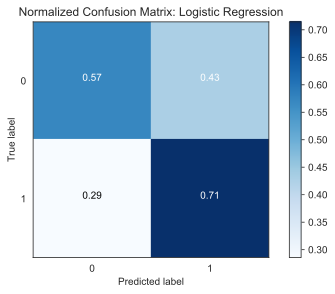

In [64]:
#Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=0, solver='lbfgs')
clf = logit.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style("white") 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

Accuracy Score is 0.9047747504720799
      0     1
0  6431   983
1   429  6985
[[0.867413  0.132587 ]
 [0.0578635 0.9421365]]


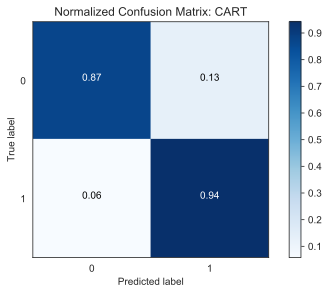

In [65]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dtfit = dt.fit(X_train, y_train)
y_predict = dtfit.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: CART')


Accuracy Score is 0.9056514701915296
      0     1
0  6444   970
1   429  6985
[[0.86916644 0.13083356]
 [0.0578635  0.9421365 ]]


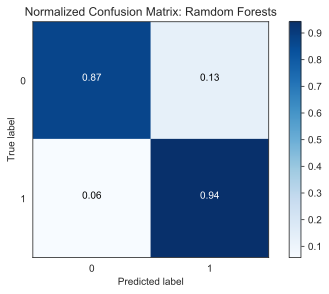

In [66]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rffit = rf.fit(X_train, y_train)
y_predict = rffit.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Ramdom Forests')

Accuracy Score is 0.6421634745076882
      0     1
0  3605  3809
1  1497  5917
[[0.48624224 0.51375776]
 [0.2019153  0.7980847 ]]


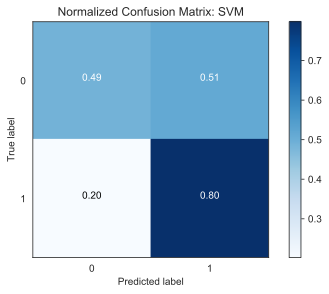

In [67]:
#SVM
from sklearn import svm
model = svm.SVC(kernel='linear', C = 1)
svmc = model.fit(X_train, y_train)
y_predict = svmc.predict(X_test)
print('Accuracy Score is',accuracy_score(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')


In [ ]:
# def feature_data(new_data,ivtable):
#     new_data['Gender'] = new_data['Gender'].replace(['F','M'],[0,1])
#     iv, data = calc_iv(new_data,'Gender','target')
#     ivtable.loc[ivtable['variable']=='Gender','IV']=iv
    
#     new_data['Car'] = new_data['Car'].replace(['N','Y'],[0,1])
#     iv, data=calc_iv(new_data,'Car','target')
#     ivtable.loc[ivtable['variable']=='Car','IV']=iv
    
#     new_data['Reality'] = new_data['Reality'].replace(['N','Y'],[0,1])
#     iv, data=calc_iv(new_data,'Reality','target')
#     ivtable.loc[ivtable['variable']=='Reality','IV']=iv
    
#     new_data['phone']=new_data['phone'].astype(str)
#     new_data.drop(new_data[new_data['phone'] == 'nan' ].index, inplace=True)
#     iv, data=calc_iv(new_data,'phone','target')
#     ivtable.loc[ivtable['variable']=='phone','IV']=iv
    
#     new_data['email']=new_data['email'].astype(str)
#     iv, data=calc_iv(new_data,'email','target')
#     ivtable.loc[ivtable['variable']=='email','IV']=iv
    
#     new_data['wkphone']=new_data['wkphone'].astype(str)
#     iv, data = calc_iv(new_data,'wkphone','target')
#     new_data.drop(new_data[new_data['wkphone'] == 'nan' ].index, inplace=True)
#     ivtable.loc[ivtable['variable']=='wkphone','IV']=iv
    
#     new_data.loc[new_data['ChldNo'] >= 2,'ChldNo']='2More'
#     iv, data=calc_iv(new_data,'ChldNo','target')
#     ivtable.loc[ivtable['variable']=='ChldNo','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'ChldNo')
    
#     new_data['inc']=new_data['inc'].astype(object)
#     new_data['inc'] = new_data['inc']/10000 
# #     print(new_data['inc'].value_counts(bins=10,sort=False))
# #     new_data['inc'].plot(kind='hist',bins=50,density=True)
#     new_data = get_category(new_data,'inc', 3, ["low","medium", "high"], qcut = True)
#     iv, data = calc_iv(new_data,'gp_inc','target')
#     ivtable.loc[ivtable['variable']=='inc','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'gp_inc')

#     new_data['Age']=-(new_data['DAYS_BIRTH'])//365
# #     print(new_data['Age'].value_counts(bins=10,normalize=True,sort=False))
# #     new_data['Age'].plot(kind='hist',bins=20,density=True)
#     new_data = get_category(new_data,'Age',5, ["lowest","low","medium","high","highest"])
#     iv, data = calc_iv(new_data,'gp_Age','target')
#     ivtable.loc[ivtable['variable']=='DAYS_BIRTH','IV'] = iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'gp_Age')

#     new_data['worktm']=-(new_data['DAYS_EMPLOYED'])//365	
#     new_data[new_data['worktm']<0] = np.nan #填补为缺失值
#     new_data['DAYS_EMPLOYED']
#     new_data['worktm'].fillna(new_data['worktm'].mean(),inplace=True) #均值填补
#     new_data = get_category(new_data,'worktm',5, ["lowest","low","medium","high","highest"])
#     iv, data=calc_iv(new_data,'gp_worktm','target')
#     ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'gp_worktm')

#     new_data['famsize']=new_data['famsize'].astype(int)
#     new_data['famsizegp']=new_data['famsize']
#     new_data['famsizegp']=new_data['famsizegp'].astype(object)
#     new_data.loc[new_data['famsizegp']>=3,'famsizegp']='3more'
#     iv, data=calc_iv(new_data,'famsizegp','target')
#     ivtable.loc[ivtable['variable']=='famsize','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'famsizegp')
    
#     new_data.loc[new_data['inctp']=='Pensioner','inctp']='State servant'
#     new_data.loc[new_data['inctp']=='Student','inctp']='State servant'
#     iv, data=calc_iv(new_data,'inctp','target')
#     ivtable.loc[ivtable['variable']=='inctp','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'inctp')
    
#     new_data.loc[(new_data['occyp']=='Cleaning staff') | (new_data['occyp']=='Cooking staff') | (new_data['occyp']=='Drivers') | (new_data['occyp']=='Laborers') | (new_data['occyp']=='Low-skill Laborers') | (new_data['occyp']=='Security staff') | (new_data['occyp']=='Waiters/barmen staff'),'occyp']='Laborwk'
#     new_data.loc[(new_data['occyp']=='Accountants') | (new_data['occyp']=='Core staff') | (new_data['occyp']=='HR staff') | (new_data['occyp']=='Medicine staff') | (new_data['occyp']=='Private service staff') | (new_data['occyp']=='Realty agents') | (new_data['occyp']=='Sales staff') | (new_data['occyp']=='Secretaries'),'occyp']='officewk'
#     new_data.loc[(new_data['occyp']=='Managers') | (new_data['occyp']=='High skill tech staff') | (new_data['occyp']=='IT staff'),'occyp']='hightecwk'
#     iv, data=calc_iv(new_data,'occyp','target')
#     ivtable.loc[ivtable['variable']=='occyp','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'occyp')
    
#     iv, data=calc_iv(new_data,'houtp','target')
#     ivtable.loc[ivtable['variable']=='houtp','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'houtp')
    
#     new_data.loc[new_data['edutp']=='Academic degree','edutp']='Higher education'
#     iv, data=calc_iv(new_data,'edutp','target')
#     ivtable.loc[ivtable['variable']=='edutp','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'edutp')
    
#     iv, data=calc_iv(new_data,'famtp','target')
#     ivtable.loc[ivtable['variable']=='famtp','IV']=iv
#     #!!!!!!!!!!!!!!!!!!!!!!!!!!
#     new_data = convert_dummy(new_data,'famtp')
    
#     return new_data,ivtable